In [18]:
sign_dict = {
    1: "Cấm vào",
    2: "Cấm đỗ/đợi",
    3: "Cấm quay đầu",
    4: "Tốc độ tối đa",
    5: "Các biển báo cấm khác",
    6: "Cảnh báo",
    7: "Bắt buộc"
}

In [19]:
img_dir = "../data/images01"

In [20]:
import os

categories = os.listdir(img_dir)
print(categories)

['0', '1', '2', '3', '4', '5', '6', '7']


In [21]:
data = []
labels = []
imagePaths = []

HEIGHT = 64
WIDTH = 64

N_CHANNELS = 3

In [22]:
import os
import random
# Grab image path
for k, category in enumerate(categories):
    category_path = os.path.join(img_dir, category)
    for image in os.listdir(category_path):
        # imagePaths.append([os.path.join(category_path, image), int(category) - 1])
        imagePaths.append([os.path.join(category_path, image), k])
# Random image path
random.shuffle(imagePaths)


In [23]:
print(imagePaths)

[['../data/images01\\2\\698.png', 2], ['../data/images01\\5\\79.png', 5], ['../data/images01\\5\\296.png', 5], ['../data/images01\\3\\274.png', 3], ['../data/images01\\1\\270.png', 1], ['../data/images01\\2\\388.png', 2], ['../data/images01\\3\\246.png', 3], ['../data/images01\\0\\object_42_3.jpg', 0], ['../data/images01\\3\\47.png', 3], ['../data/images01\\5\\144.png', 5], ['../data/images01\\3\\253.png', 3], ['../data/images01\\3\\401.png', 3], ['../data/images01\\7\\390.png', 7], ['../data/images01\\0\\object_17_8.jpg', 0], ['../data/images01\\7\\259.png', 7], ['../data/images01\\1\\141.png', 1], ['../data/images01\\3\\223.png', 3], ['../data/images01\\2\\16.png', 2], ['../data/images01\\3\\284.png', 3], ['../data/images01\\5\\475.png', 5], ['../data/images01\\1\\229.png', 1], ['../data/images01\\4\\404.png', 4], ['../data/images01\\5\\321.png', 5], ['../data/images01\\0\\object_5_16.jpg', 0], ['../data/images01\\6\\384.png', 6], ['../data/images01\\7\\209.png', 7], ['../data/images

In [24]:
import cv2
# Append image to DATA list
for imagePath in imagePaths:

    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))
    data.append(image)

    # Labels list
    label = imagePath[1]
    labels.append(label)

In [25]:
import numpy as np
# Convert to numpy array
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


In [26]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=50)

In [27]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(3734, 64, 64, 3)
(934, 64, 64, 3)
(3734,)
(934,)


In [28]:
from keras.utils import np_utils
trainY = np_utils.to_categorical(trainY, 8)
print(trainY)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [32]:
EPOCHS = 20
INIT_LR = 1e-3
BS = 32

class_names = categories

In [59]:
import tensorflow as tf

from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras import layers


inceptionv3 = InceptionV3(input_shape=(75, 75, 3), include_top=False, weights='imagenet')
for layer in inceptionv3.layers:
    layer.trainable = False

model = Sequential()

model.add(inceptionv3)
model.add(GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(len(class_names), activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 16392     
                                                                 
Total params: 21,819,176
Trainable params: 16,392
Non-trainable params: 21,802,784
_____________________________________

In [22]:
model.fit(trainX, trainY, batch_size=BS, epochs=EPOCHS, verbose=1)
model.save("model-inceptionv3-75px.h5")

Epoch 1/5
117/117 [==============================] - 21s 132ms/step - loss: 1.1758 - accuracy: 0.6052
Epoch 2/5
117/117 [==============================] - 18s 150ms/step - loss: 0.5672 - accuracy: 0.8179
Epoch 3/5
117/117 [==============================] - 22s 189ms/step - loss: 0.4445 - accuracy: 0.8664
Epoch 4/5
117/117 [==============================] - 23s 196ms/step - loss: 0.3978 - accuracy: 0.8755
Epoch 5/5
117/117 [==============================] - 22s 190ms/step - loss: 0.3489 - accuracy: 0.8915


In [33]:
import tensorflow as tf

from keras.applications import MobileNet
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras import layers


inceptionv3 = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
for layer in inceptionv3.layers:
    layer.trainable = False

model = Sequential()

model.add(inceptionv3)
model.add(GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(len(class_names), activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 2, 2, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 8200      
                                                                 
Total params: 3,237,064
Trainable params: 8,200
Non-tr

In [34]:
model.fit(trainX, trainY, batch_size=BS, epochs=EPOCHS, verbose=1)
model.save("model-mobilenet-75px.h5")

Epoch 1/20
117/117 [==============================] - 10s 70ms/step - loss: 1.5343 - accuracy: 0.5225
Epoch 2/20
117/117 [==============================] - 10s 88ms/step - loss: 0.7409 - accuracy: 0.7555
Epoch 3/20
117/117 [==============================] - 9s 81ms/step - loss: 0.5752 - accuracy: 0.8254
Epoch 4/20
117/117 [==============================] - 9s 81ms/step - loss: 0.4993 - accuracy: 0.8447
Epoch 5/20
117/117 [==============================] - 9s 81ms/step - loss: 0.4358 - accuracy: 0.8637
Epoch 6/20
117/117 [==============================] - 10s 85ms/step - loss: 0.4315 - accuracy: 0.8674
Epoch 7/20
117/117 [==============================] - 10s 83ms/step - loss: 0.3877 - accuracy: 0.8806
Epoch 8/20
117/117 [==============================] - 10s 83ms/step - loss: 0.3731 - accuracy: 0.8856
Epoch 9/20
117/117 [==============================] - 10s 85ms/step - loss: 0.3560 - accuracy: 0.8913
Epoch 10/20
117/117 [==============================] - 11s 91ms/step - loss: 0.3312 -

30/30 [==============================] - 12s 244ms/step


C:\Users\trung\AppData\Local\Temp\ipykernel_17908\4112275657.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
C:\Users\trung\AppData\Local\Temp\ipykernel_17908\4112275657.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


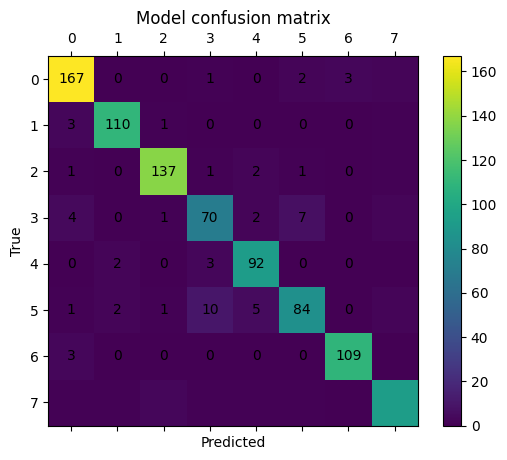

Accuracy : 92.29%


In [23]:
from numpy import  argmax
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

pred = model.predict(testX)
predictions = argmax(pred, axis=1)

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(8):
    for j in range(8):
        ax.text(i, j, cm[j, i], va='center', ha='center')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [33]:
from tensorflow import keras
import numpy as np

model_v1 = keras.models.load_model("model-inceptionv3-75px.h5")

img = cv2.imread("../data/136.png")
img = cv2.resize(img, (75, 75))

img_array=np.array(img, dtype="float") / 255.0
img_batch=np.expand_dims(img_array, axis=0)

pred = model.predict(img_batch)
Res = argmax(pred, axis=1)
print(pred)
print(Res)
print(str(round(pred[0][Res[0]]*100, 1)) + "%")


1/1 [==============================] - 0s 72ms/step
[[4.9308761e-05 1.8870567e-04 9.5405298e-01 1.7907200e-04 1.4759478e-04
  3.2863714e-04 1.4668645e-06 4.5052305e-02]]
[2]
95.4%
